In [1]:
%matplotlib inline
from sklearn.datasets import load_iris
from  scipy.spatial.distance import euclidean
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import random, sys
import matplotlib.pyplot as plt
from scipy import ndimage
import cPickle as pickle
import scipy.io.wavfile as wav
from pylab import plt
from scipy.signal import butter, lfilter, freqz
from sklearn.cross_validation import train_test_split
from librosa.util import normalize
import kmeans as km

/Users/apple/anaconda/lib/python2.7/site-packages/librosa/core/audio.py:37: UserWarning: Could not import scikits.samplerate. Falling back to scipy.signal
  warnings.warn('Could not import scikits.samplerate. '


Homework 4 Experiments
-----------------------------------------------------

# Run regular kmeans
* Run regular kmeans and visualize it


init
Start kmeans


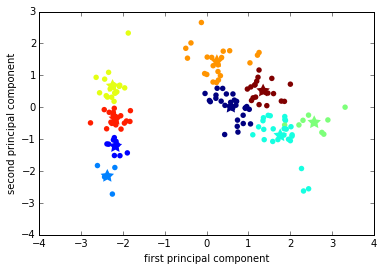

/Users/apple/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


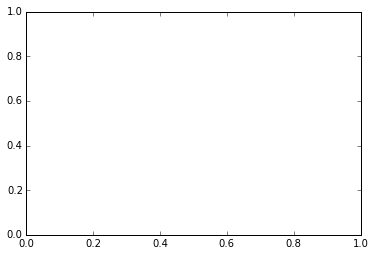

In [2]:
def plotPCA(X, y, centroids):
  pca = PCA()
  pca.fit(X)
  X_pca = pca.transform(X)
  centroids_pca = pca.transform(centroids)
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, linewidths=0, s=30)
  plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], linewidths=0, s=200, marker=(5, 1), c=[i for i in xrange(len(centroids_pca))])
  plt.xlabel('first principal component')
  plt.ylabel('second principal component')
  plt.show()

#Data import and preprocessing
scaler = StandardScaler()
iris = load_iris()
X, y = iris.data, iris.target
scaler.fit(X)
X = scaler.transform(X)
#regular kmeans
kmeans = km.mykmeans(10, 50)
kmeans.mykmeans(X)
centroids = kmeans.centroids()
y = kmeans.getGroup(X)
km.plotPCA(X, y, centroids)


# Run kmeans_multi
* Run kmeans_multi and visualize it


Start kmeans


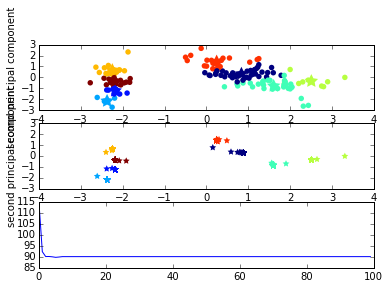

first/last distortions: 114.88914399 90.1057336549
number of centroids: 8


In [6]:
#kmeans_multi
mykmeans_multi = km.mykmeans_multi(8, 100)
mykmeans_multi.mykmeans(X)
centroids = mykmeans_multi.getBestCentroids()
y = mykmeans_multi.getGroup(X, centroids)
centroids_all = mykmeans_multi.getCentroidsOverIteration()
distortions = mykmeans_multi.getDistortionsOverIteration()
km.plotPCA_multi(X, y, centroids, centroids_all, distortions)
print 'first/last distortions:', distortions[0], distortions[-1]
print 'number of centroids:', len(centroids)

# Run kmeans++
* Run kmeans++ and visualize it


Start kmeans


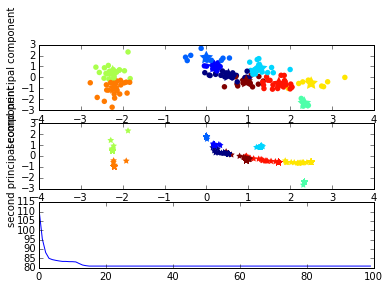

first/last distortions: 111.464359968 80.9184992523
number of centroids: 10


In [8]:
#kmeans_pp
mykmeans_pp = km.mykmeans_pp(10, 100)
mykmeans_pp.mykmeans(X)
centroids = mykmeans_pp.getBestCentroids()
y = mykmeans_pp.getGroup(X, centroids)
centroids_all = mykmeans_pp.getCentroidsOverIteration()
distortions = mykmeans_pp.getDistortionsOverIteration()
km.plotPCA_multi(X, y, centroids, centroids_all, distortions)
print 'first/last distortions:', distortions[0], distortions[-1]
print 'number of centroids:', len(centroids)